In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/used_cars.csv")
data = df.copy()

In [3]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [5]:
with open('../data/data_source_link_and _description.txt','r') as f:
    print(f.read())

Used Car Price Prediction Dataset

https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset/data

About Dataset
Used Car Price Prediction Dataset is a comprehensive collection of automotive information extracted from the popular automotive marketplace website, https://www.cars.com. This dataset comprises 4,009 data points, each representing a unique vehicle listing, and includes nine distinct features providing valuable insights into the world of automobiles.

Brand & Model: Identify the brand or company name along with the specific model of each vehicle.
Model Year: Discover the manufacturing year of the vehicles, crucial for assessing depreciation and technology advancements.
Mileage: Obtain the mileage of each vehicle, a key indicator of wear and tear and potential maintenance requirements.
Fuel Type: Learn about the type of fuel the vehicles run on, whether it's gasoline, diesel, electric, or hybrid.
Engine Type: Understand the engine specifications, shedding li

## Examining quality of the data

In [6]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [7]:
df['brand'].unique()

array(['Ford', 'Hyundai', 'Lexus', 'INFINITI', 'Audi', 'Acura', 'BMW',
       'Tesla', 'Land', 'Aston', 'Toyota', 'Lincoln', 'Jaguar',
       'Mercedes-Benz', 'Dodge', 'Nissan', 'Genesis', 'Chevrolet', 'Kia',
       'Jeep', 'Bentley', 'Honda', 'Lucid', 'MINI', 'Porsche', 'Hummer',
       'Chrysler', 'Volvo', 'Cadillac', 'Lamborghini', 'Maserati',
       'Volkswagen', 'Subaru', 'Rivian', 'GMC', 'RAM', 'Alfa', 'Ferrari',
       'Scion', 'Mitsubishi', 'Mazda', 'Saturn', 'Bugatti', 'Polestar',
       'Rolls-Royce', 'McLaren', 'Buick', 'Lotus', 'Pontiac', 'FIAT',
       'Karma', 'Saab', 'Mercury', 'Plymouth', 'smart', 'Maybach',
       'Suzuki'], dtype=object)

In [8]:
len(df['model'].unique())

1898

In [9]:
df['model'].unique()[:50]

array(['Utility Police Interceptor Base', 'Palisade SEL', 'RX 350 RX 350',
       'Q50 Hybrid Sport', 'Q3 45 S line Premium Plus', 'ILX 2.4L',
       'S3 2.0T Premium Plus', '740 iL', 'RC 350 F Sport',
       'Model X Long Range Plus',
       'Rover Range Rover Sport 3.0 Supercharged HST',
       'Martin DBS Superleggera', 'Supra 3.0 Premium',
       'Aviator Reserve AWD', 'F-TYPE', 'Rover LR4 HSE', 'Metris Base',
       'Challenger SXT', '350Z Enthusiast', 'F-TYPE R', 'GV70 3.5T Sport',
       'S-10 LS', '440 Gran Coupe 440i xDrive', 'F-150 XLT',
       'Suburban RST', 'Elantra N Base', 'Sentra SR',
       'AMG CLA 45 Base 4MATIC', '650 Gran Coupe i xDrive',
       'Q5 2.0T Premium Plus', 'AMG C 43 Base 4MATIC',
       'Ram 1500 Laramie Mega Cab', 'i3 120Ah w/Range Extender',
       'Sorento SX', 'LX 570 Base', 'New Compass Trailhawk', '340 i',
       'A4 2.0T Premium Plus quattro', 'Tucson SE', 'Z4 sDrive28i',
       'Continental GTC Base', 'Passport Elite', 'Sprinter 2500',
       '

In [10]:
df['model_year'].unique()

array([2013, 2021, 2022, 2015, 2016, 2017, 2001, 2020, 2019, 2003, 2018,
       2023, 2000, 2006, 2011, 2012, 2007, 2014, 2005, 2009, 2010, 2004,
       2008, 1997, 1999, 1993, 2002, 1998, 2024, 1996, 1974, 1992, 1995,
       1994], dtype=int64)

In [11]:
df['milage'].unique()[:50]

array(['51,000 mi.', '34,742 mi.', '22,372 mi.', '88,900 mi.',
       '9,835 mi.', '136,397 mi.', '84,000 mi.', '242,000 mi.',
       '23,436 mi.', '34,000 mi.', '27,608 mi.', '22,770 mi.',
       '12,500 mi.', '18,196 mi.', '15,903 mi.', '79,800 mi.',
       '1,685 mi.', '61,074 mi.', '74,000 mi.', '35,250 mi.', '5,400 mi.',
       '133,510 mi.', '25,990 mi.', '2,823 mi.', '52,000 mi.',
       '11,650 mi.', '96,541 mi.', '17,500 mi.', '69,000 mi.',
       '81,880 mi.', '28,800 mi.', '300,183 mi.', '35,035 mi.',
       '171,000 mi.', '118,700 mi.', '119,000 mi.', '44,261 mi.',
       '125,575 mi.', '16,200 mi.', '70,000 mi.', '20,200 mi.',
       '2,978 mi.', '189,719 mi.', '9,949 mi.', '3,552 mi.', '54,000 mi.',
       '51,351 mi.', '24,280 mi.', '89,148 mi.', '73,043 mi.'],
      dtype=object)

In [12]:
df['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', nan, 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [13]:
len(df['engine'].unique())

1146

In [14]:
df['engine'].unique()[:20]

array(['300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability',
       '3.8L V6 24V GDI DOHC', '3.5 Liter DOHC',
       '354.0HP 3.5L V6 Cylinder Engine Gas/Electric Hybrid',
       '2.0L I4 16V GDI DOHC Turbo', '2.4 Liter',
       '292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel',
       '282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel',
       '311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel',
       '534.0HP Electric Motor Electric Fuel System', 'V6',
       '715.0HP 5.2L 12 Cylinder Engine Gasoline Fuel',
       '382.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel',
       '400.0HP 3.0L V6 Cylinder Engine Gasoline Fuel',
       '2.0 Liter Supercharged',
       '375.0HP 5.0L 8 Cylinder Engine Gasoline Fuel',
       '305.0HP 3.6L V6 Cylinder Engine Gasoline Fuel',
       '287.0HP 3.5L V6 Cylinder Engine Gasoline Fuel',
       '550.0HP 5.0L 8 Cylinder Engine Gasoline Fuel',
       '375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel'], dtype=object)

In [15]:
df['transmission'].unique()

array(['6-Speed A/T', '8-Speed Automatic', 'Automatic', '7-Speed A/T',
       'F', 'A/T', '8-Speed A/T', 'Transmission w/Dual Shift Mode',
       '9-Speed Automatic', '6-Speed M/T', '10-Speed A/T', '9-Speed A/T',
       '5-Speed A/T', '1-Speed A/T', 'Automatic CVT',
       '7-Speed Automatic with Auto-Shift', 'CVT-F', 'M/T',
       '6-Speed Automatic with Auto-Shift', '10-Speed Automatic',
       'CVT Transmission', '4-Speed A/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T',
       '8-Speed Automatic with Auto-Shift', '5-Speed Automatic',
       '8-SPEED AT', '1-Speed Automatic', '5-Speed M/T', 'Manual',
       '6-Speed Manual', 'Variable', '2', '7-Speed Manual',
       'Automatic, 9-Spd 9G-Tronic', 'Automatic, 8-Spd',
       'Automatic, 8-Spd Sport w/Sport & Manual Modes', '–',
       'Auto, 6-Spd w/CmdShft', 'Transmission Overdrive Switch',
       '7-Speed Automatic', 'Automatic, 8-Spd PDK Dual-Clutch',
       'Automatic, 8-Spd M STEPTRONIC w/Drivelogic, Sport & Ma

In [16]:
len(df['ext_col'].unique())

319

In [17]:
len(df['int_col'].unique())

156

In [18]:
df['accident'].unique()

array(['At least 1 accident or damage reported', 'None reported', nan],
      dtype=object)

In [19]:
df['clean_title'].unique()

array(['Yes', nan], dtype=object)

In [20]:
df['price'].unique()[:50]

array(['$10,300', '$38,005', '$54,598', '$15,500', '$34,999', '$14,798',
       '$31,000', '$7,300', '$41,927', '$69,950', '$73,897', '$184,606',
       '$53,500', '$62,000', '$47,998', '$29,990', '$250,000', '$16,800',
       '$11,000', '$68,750', '$60,000', '$4,500', '$38,598', '$58,504',
       '$61,000', '$32,300', '$13,998', '$59,995', '$25,700', '$21,375',
       '$48,000', '$10,900', '$24,998', '$5,999', '$46,900', '$15,900',
       '$33,598', '$8,999', '$8,200', '$20,000', '$79,950', '$45,498',
       '$14,000', '$75,798', '$119,999', '$36,880', '$43,147', '$29,000',
       '$17,500', '$30,990'], dtype=object)

**_Quality_**
* inconsistent model values ❌ (feature eleminating - cause no pattern in feature)
* milage has ',' and ' mi.' included ✔️
* milage has object as datatype need to convert to int ✔️
* fuel_type contains 'nan', '-', 'not supported' values ✔️
* could engineer multiple features from engine feature ✔️ ('engine_size', 'horsepower', 'cylinder_count')
* convert transmission feature into categorical feature (automatic, manual, unknown) ✔️
* transform ext_col into fewer categories (like blue, red, black, white, etc.) ✔️
* transform int_col into fewer categories ✔️
* price column has ',' and '$' included ✔️
* price column should numeric ✔️
* missing values: fuel_type, accident, clean_title
* engineered features ('engine_size', 'horsepower', 'cylinder_count') have missing values

## Data Cleaning

In [21]:
df['milage'][0]

'51,000 mi.'

In [22]:
#feature - milage

def clean_milage(milage):
    cleaned_milage = milage[:-4].split(',')
    cleaned_milage = int("".join(cleaned_milage))
    return cleaned_milage

In [23]:
df['milage'] = df['milage'].apply(clean_milage)

In [24]:
df.head(1)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"


<Axes: xlabel='milage', ylabel='Count'>

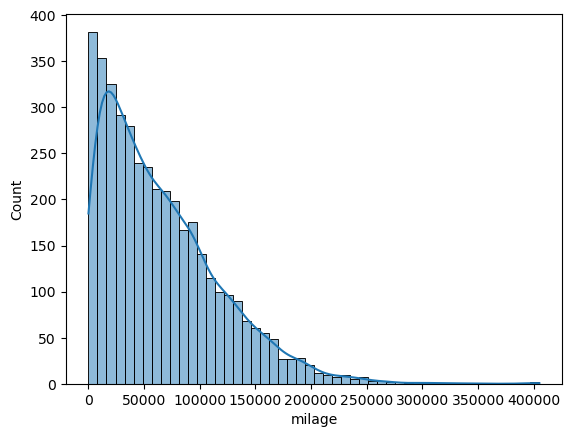

In [25]:
sns.histplot(x='milage',data=df, bins=50, kde=True)

In [26]:
#feature - fuel_type

def clean_fuel_type(fuel_type):
    if fuel_type=='Plug-In Hybrid':
        fuel_type = "Hybrid"
    elif fuel_type in ['–', 'not supported', np.nan]:
        fuel_type = "Unknown"
        
    return fuel_type

In [27]:
df['fuel_type'] = df['fuel_type'].apply(clean_fuel_type)

In [28]:
#feature - transmission

automatic = ["a/t","cvt",'dual-clutch','auto-shift','automatic']
manual = ['m/t','manual']
def clean_transmission(transmission):
    if any(x in transmission.lower() for x in automatic):
        transmission = "Automatic"
    elif any(x in transmission.lower() for x in manual):
        transmission = "Manual"
    else:
        transmission = "Unknown"
        
    return transmission

In [29]:
df['transmission'] = df['transmission'].apply(clean_transmission)

In [30]:
#feature - ext_col

df['ext_col'].apply(lambda x: x if " " not in x else None).unique()

array(['Black', None, 'Blue', 'Silver', 'Green', 'Yellow', 'White',
       'Gray', 'Purple', 'Red', 'Gold', '–', 'Orange', 'Beige', 'Verde',
       'Blu', 'BLACK', 'Brown', 'Glacier', 'Maroon', 'Ice', 'Onyx',
       'Chalk', 'BLUE', 'Metallic', 'Tan', 'Pink', 'Yulong', 'Tempest',
       'Caviar', 'Blueprint', 'Granite', 'Obsidian', 'Rosso'],
      dtype=object)

In [31]:
colors = ['black','blue','red','white','silver','green','gray','yellow','purple','gold','orange','brown','pink', 'grey']  
#most common colors are listed first
def clean_color(color):
    for c in colors:
        if c in color.lower():
            cleaned_color = c.capitalize()
            break
        else:
            cleaned_color = "Other"
            
    if cleaned_color=='Gray':
        return "Grey"
    
    return cleaned_color

In [32]:
df['ext_col'] = df['ext_col'].apply(clean_color)

In [33]:
df['int_col'] = df['int_col'].apply(clean_color)

In [34]:
df.head(2)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,Automatic,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,Automatic,Other,Grey,At least 1 accident or damage reported,Yes,"$38,005"


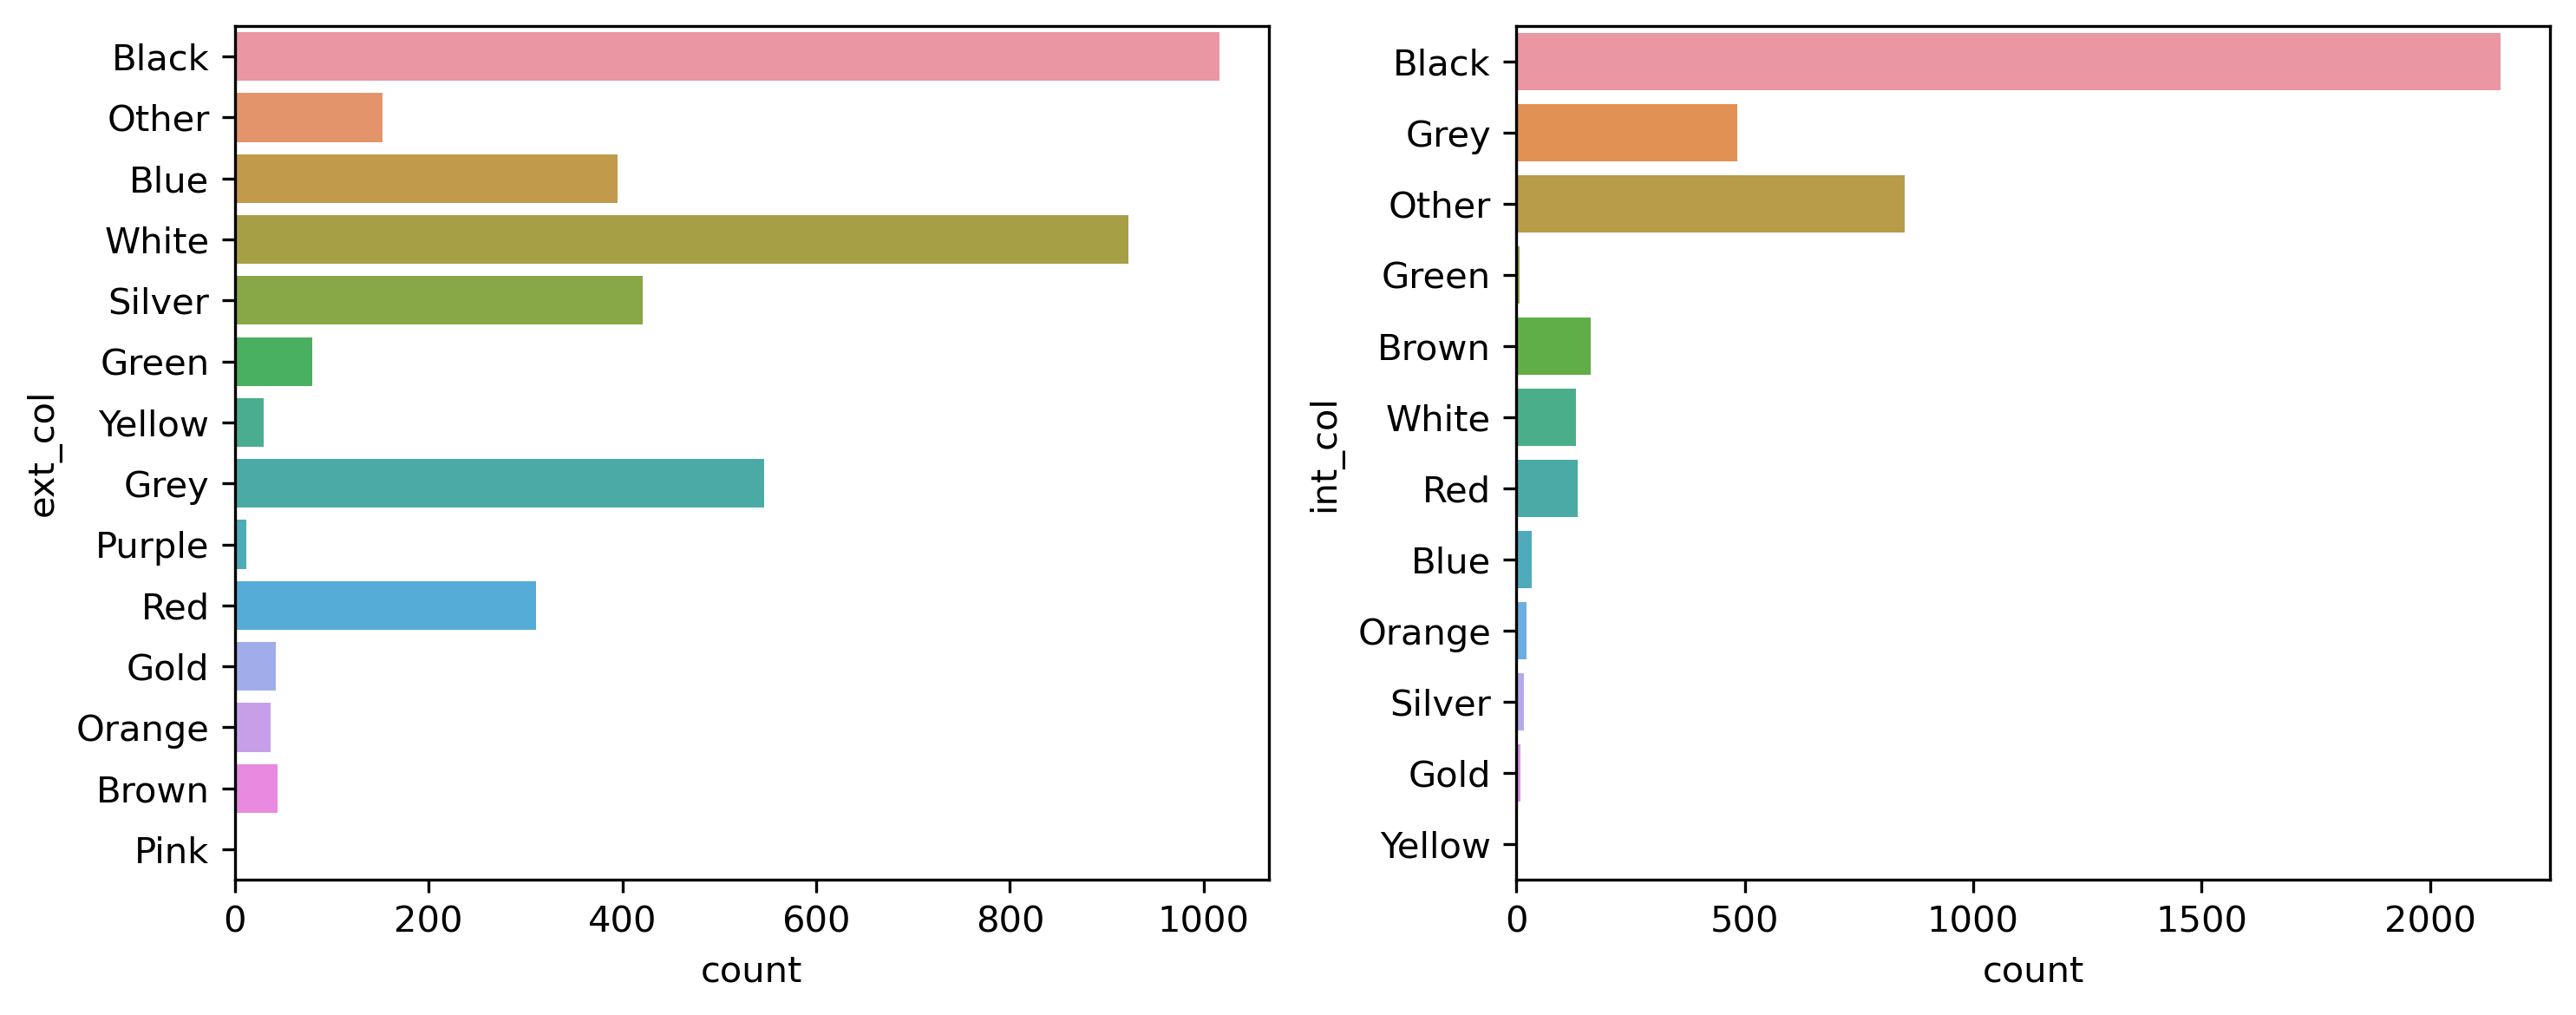

In [35]:
fig, axes = plt.subplots(ncols=2,figsize=(10,4),dpi=300)
sns.countplot(y='ext_col',data=df, ax=axes[0])
sns.countplot(y='int_col',data=df, ax=axes[1])
plt.tight_layout()

In [36]:
df['accident'].unique()

array(['At least 1 accident or damage reported', 'None reported', nan],
      dtype=object)

In [37]:
df['clean_title'].unique()

array(['Yes', nan], dtype=object)

In [38]:
#feature - price

def clean_price(amt):
    cleaned_price = amt[1:].split(',')
    cleaned_price = int("".join(cleaned_price))
    
    return cleaned_price

In [39]:
df['price'] = df['price'].apply(clean_price)

In [40]:
df.head(2)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,Automatic,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,Automatic,Other,Grey,At least 1 accident or damage reported,Yes,38005


<Axes: xlabel='price', ylabel='Count'>

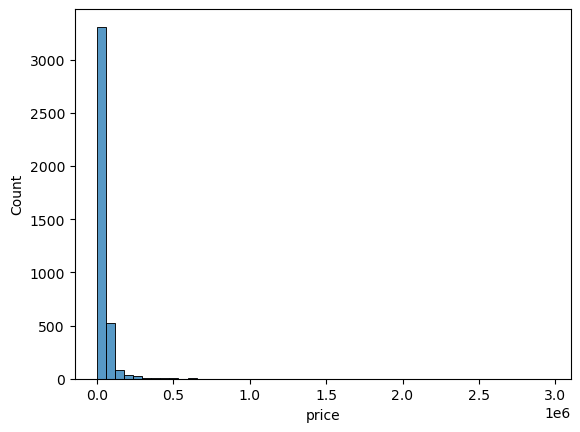

In [41]:
sns.histplot(x='price',data=df, bins=50)

## Feature Engineering

In [42]:
#feature - engine

df['engine'].unique()[:10]

array(['300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability',
       '3.8L V6 24V GDI DOHC', '3.5 Liter DOHC',
       '354.0HP 3.5L V6 Cylinder Engine Gas/Electric Hybrid',
       '2.0L I4 16V GDI DOHC Turbo', '2.4 Liter',
       '292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel',
       '282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel',
       '311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel',
       '534.0HP Electric Motor Electric Fuel System'], dtype=object)

In [43]:
# creating new feature - "engine_size"

def extract_engine_size(engine_description):
    
    words = engine_description.split()
    
    for i in words:
        if i[-1]=="L":
            engine_size = float(i[:-1])
            break
        else:
            engine_size = np.nan
            
    return engine_size

In [44]:
df['engine_size'] = df['engine'].apply(extract_engine_size)

In [45]:
df.head(1)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,engine_size
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,Automatic,Black,Black,At least 1 accident or damage reported,Yes,10300,3.7


<Axes: xlabel='engine_size', ylabel='Count'>

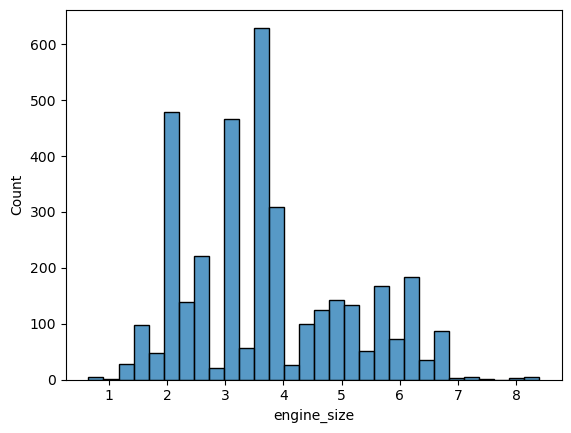

In [46]:
sns.histplot(x="engine_size",data=df, bins=30)

In [47]:
# creating new feature - "horsepower"

def extract_horsepower(engine_description):
    
    words = engine_description.split()
    
    for i in words:
        if i[-2:]=="HP":
            horsepower = float(i[:-2])
            break
        else:
            horsepower = np.nan
            
    return horsepower

In [48]:
df['horsepower'] = df['engine'].apply(extract_horsepower)

In [49]:
df.head(1)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,engine_size,horsepower
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,Automatic,Black,Black,At least 1 accident or damage reported,Yes,10300,3.7,300.0


<Axes: xlabel='horsepower', ylabel='Count'>

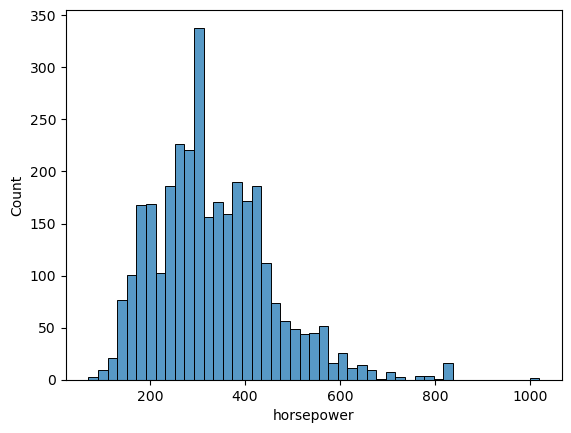

In [50]:
sns.histplot(x="horsepower",data=df)

In [51]:
# creating new feature - "cylinder_count"

def extract_cylinder_count(engine_description):
    
    words = engine_description.split()
    
    for i in range(len(words)):
        if words[i]=="Cylinder":
            cylinder_count = words[i-1]
            if words[i-1].isdigit():
                cylinder_count = int(words[i-1])
            else:
                cylinder_count = int(words[i-1][1:])
            break
        else:
            cylinder_count = np.nan
            
    return cylinder_count

In [52]:
df['cylinder_count'] = df['engine'].apply(extract_cylinder_count)

In [53]:
df.head(1)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,engine_size,horsepower,cylinder_count
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,Automatic,Black,Black,At least 1 accident or damage reported,Yes,10300,3.7,300.0,6.0


<Axes: xlabel='cylinder_count', ylabel='count'>

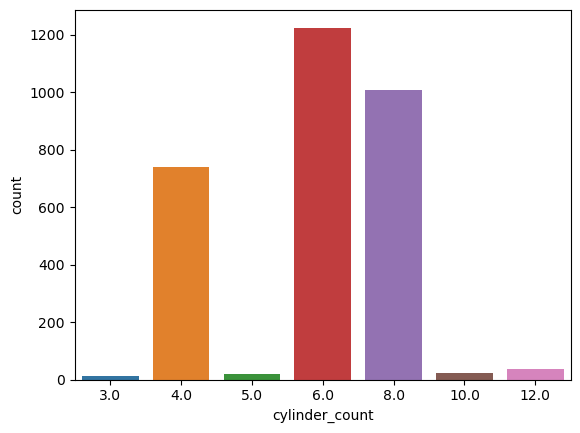

In [54]:
sns.countplot(x="cylinder_count",data=df)

## Dealing with outliers

In [55]:
#removing overvalued cars

df = df[df['price']<0.5*1e6]

In [56]:
#applying log transformation to target variable

df['log_transformed_price'] = np.log1p(df['price'])

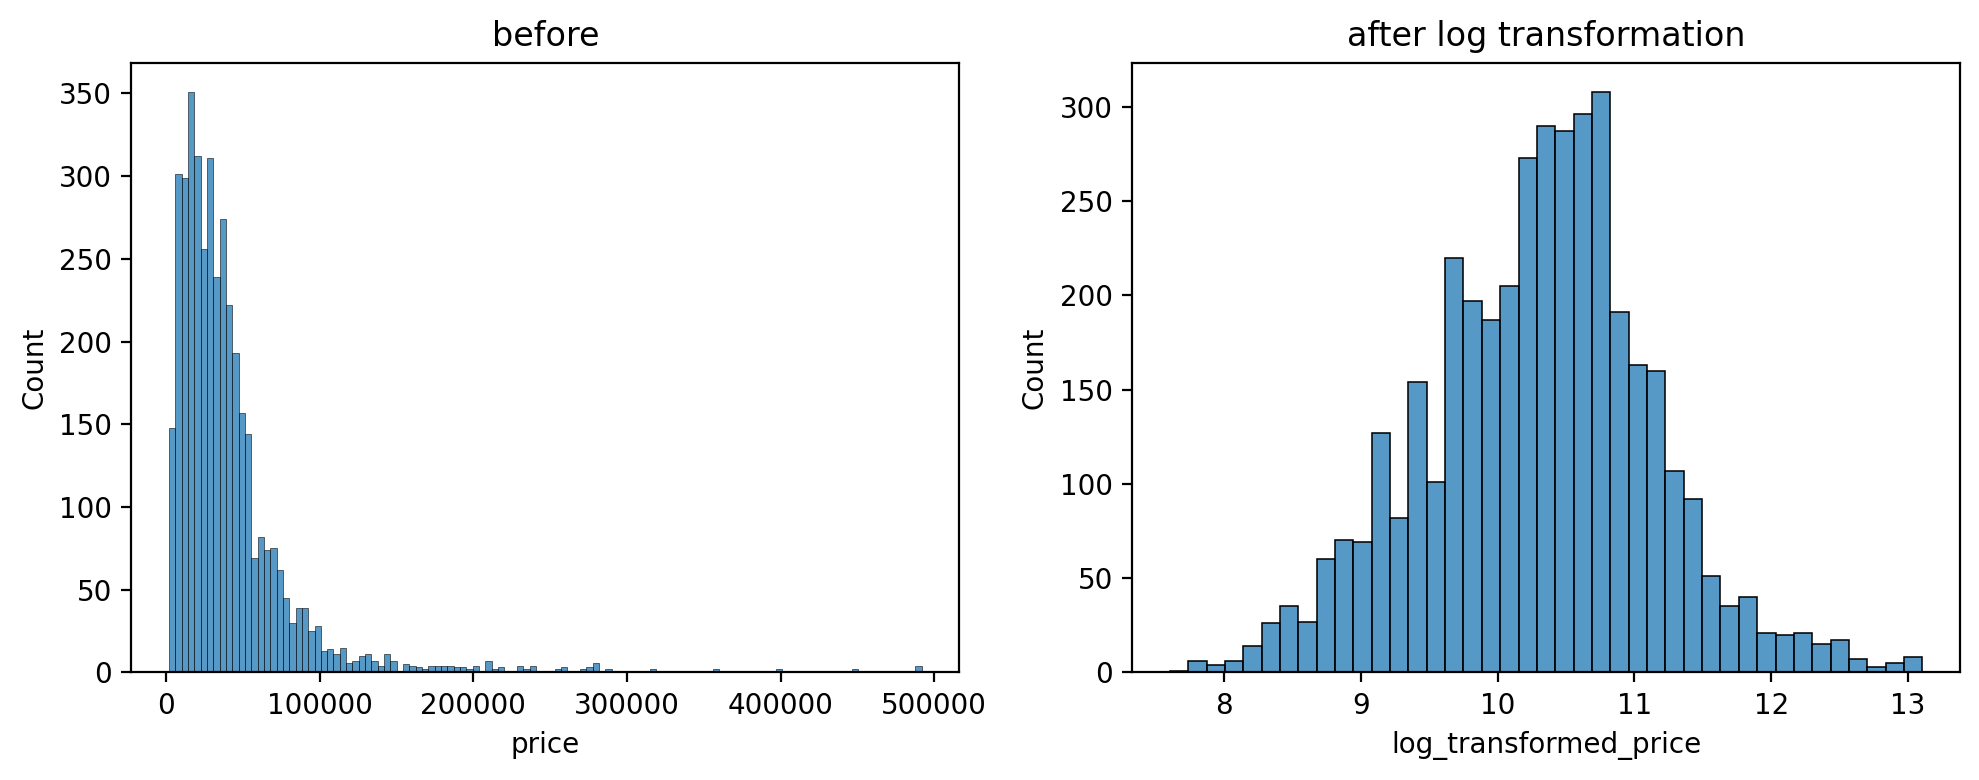

In [57]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4),dpi=200)
sns.histplot(x='price',data=df,ax=axes[0])
sns.histplot(x='log_transformed_price',data=df,ax=axes[1])
axes[0].set_title('before')
axes[1].set_title('after log transformation')
plt.tight_layout()
plt.show()

C:\Users\THINKPAD\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


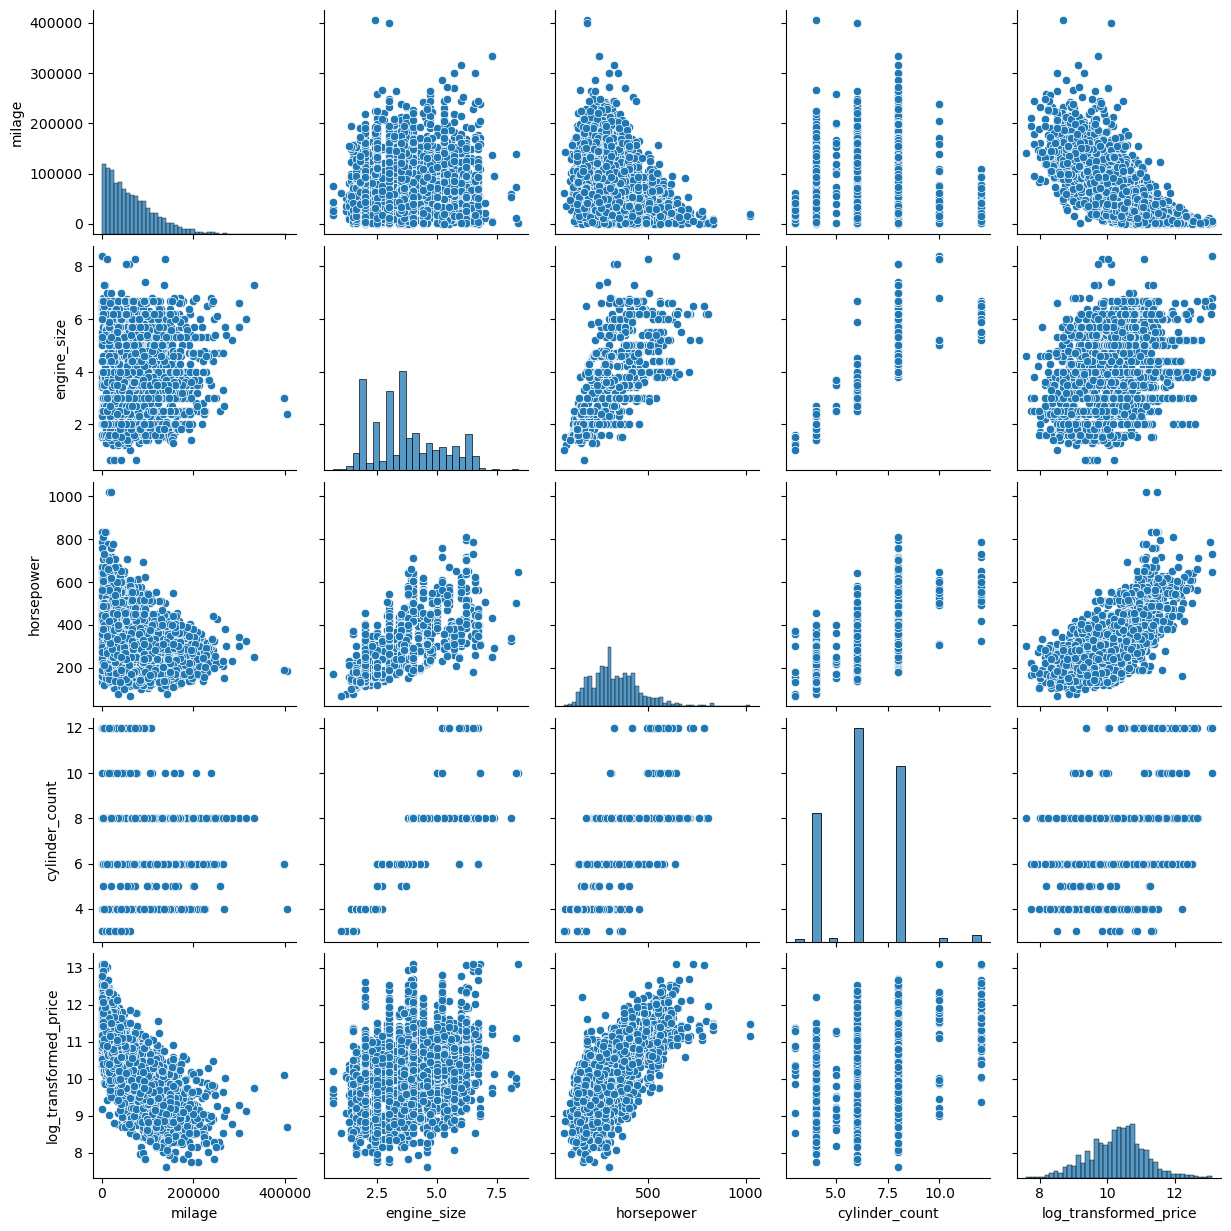

In [58]:
sns.pairplot(df[['milage','engine_size','horsepower','cylinder_count','log_transformed_price']])

In [59]:
df.corr(numeric_only=True)['log_transformed_price']

model_year               0.638892
milage                  -0.712566
price                    0.798062
engine_size              0.266214
horsepower               0.670331
cylinder_count           0.306690
log_transformed_price    1.000000
Name: log_transformed_price, dtype: float64

## Dealing with missing values

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4001 entries, 0 to 4008
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  4001 non-null   object 
 1   model                  4001 non-null   object 
 2   model_year             4001 non-null   int64  
 3   milage                 4001 non-null   int64  
 4   fuel_type              4001 non-null   object 
 5   engine                 4001 non-null   object 
 6   transmission           4001 non-null   object 
 7   ext_col                4001 non-null   object 
 8   int_col                4001 non-null   object 
 9   accident               3888 non-null   object 
 10  clean_title            3405 non-null   object 
 11  price                  4001 non-null   int64  
 12  engine_size            3625 non-null   float64
 13  horsepower             3198 non-null   float64
 14  cylinder_count         3061 non-null   float64
 15  log_trans

In [61]:
df.isna().sum()

brand                      0
model                      0
model_year                 0
milage                     0
fuel_type                  0
engine                     0
transmission               0
ext_col                    0
int_col                    0
accident                 113
clean_title              596
price                      0
engine_size              376
horsepower               803
cylinder_count           940
log_transformed_price      0
dtype: int64

In [62]:
percent_missing = 100*df.isna().sum()/len(df)
percent_missing = percent_missing[percent_missing>0]

Text(0.5, 1.0, 'Percentage of missing values in features')

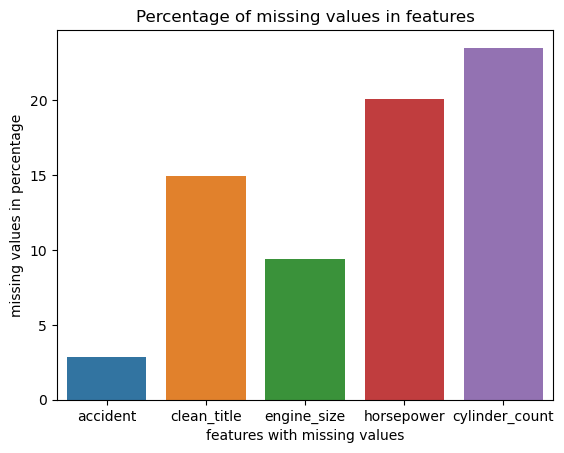

In [63]:
sns.barplot(x=percent_missing.index,y=percent_missing)
plt.xlabel("features with missing values")
plt.ylabel("missing values in percentage")
plt.title("Percentage of missing values in features")

In [64]:
# fixing feature - accident
df['accident'] = df['accident'].fillna("Do not know")

In [65]:
# fixing feature - clean_title
df['clean_title'] = df['clean_title'].fillna("Unknown")

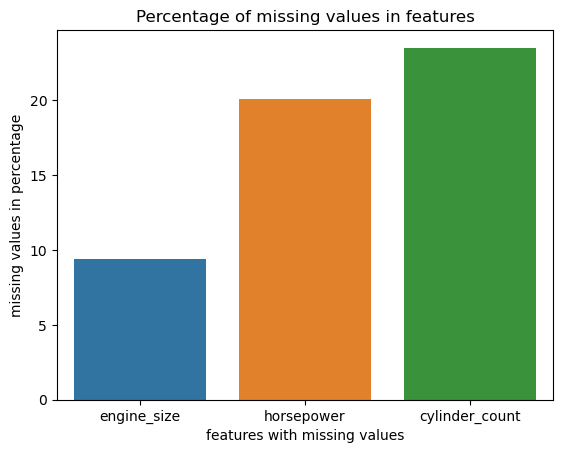

In [66]:
# newly engineered features

percent_missing = 100*df.isna().sum()/len(df)
percent_missing = percent_missing[percent_missing>0]
sns.barplot(x=percent_missing.index,y=percent_missing)
plt.xlabel("features with missing values")
plt.ylabel("missing values in percentage")
plt.title("Percentage of missing values in features")
plt.show()

C:\Users\THINKPAD\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\THINKPAD\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\THINKPAD\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\THINKPAD\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\THINKPAD\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


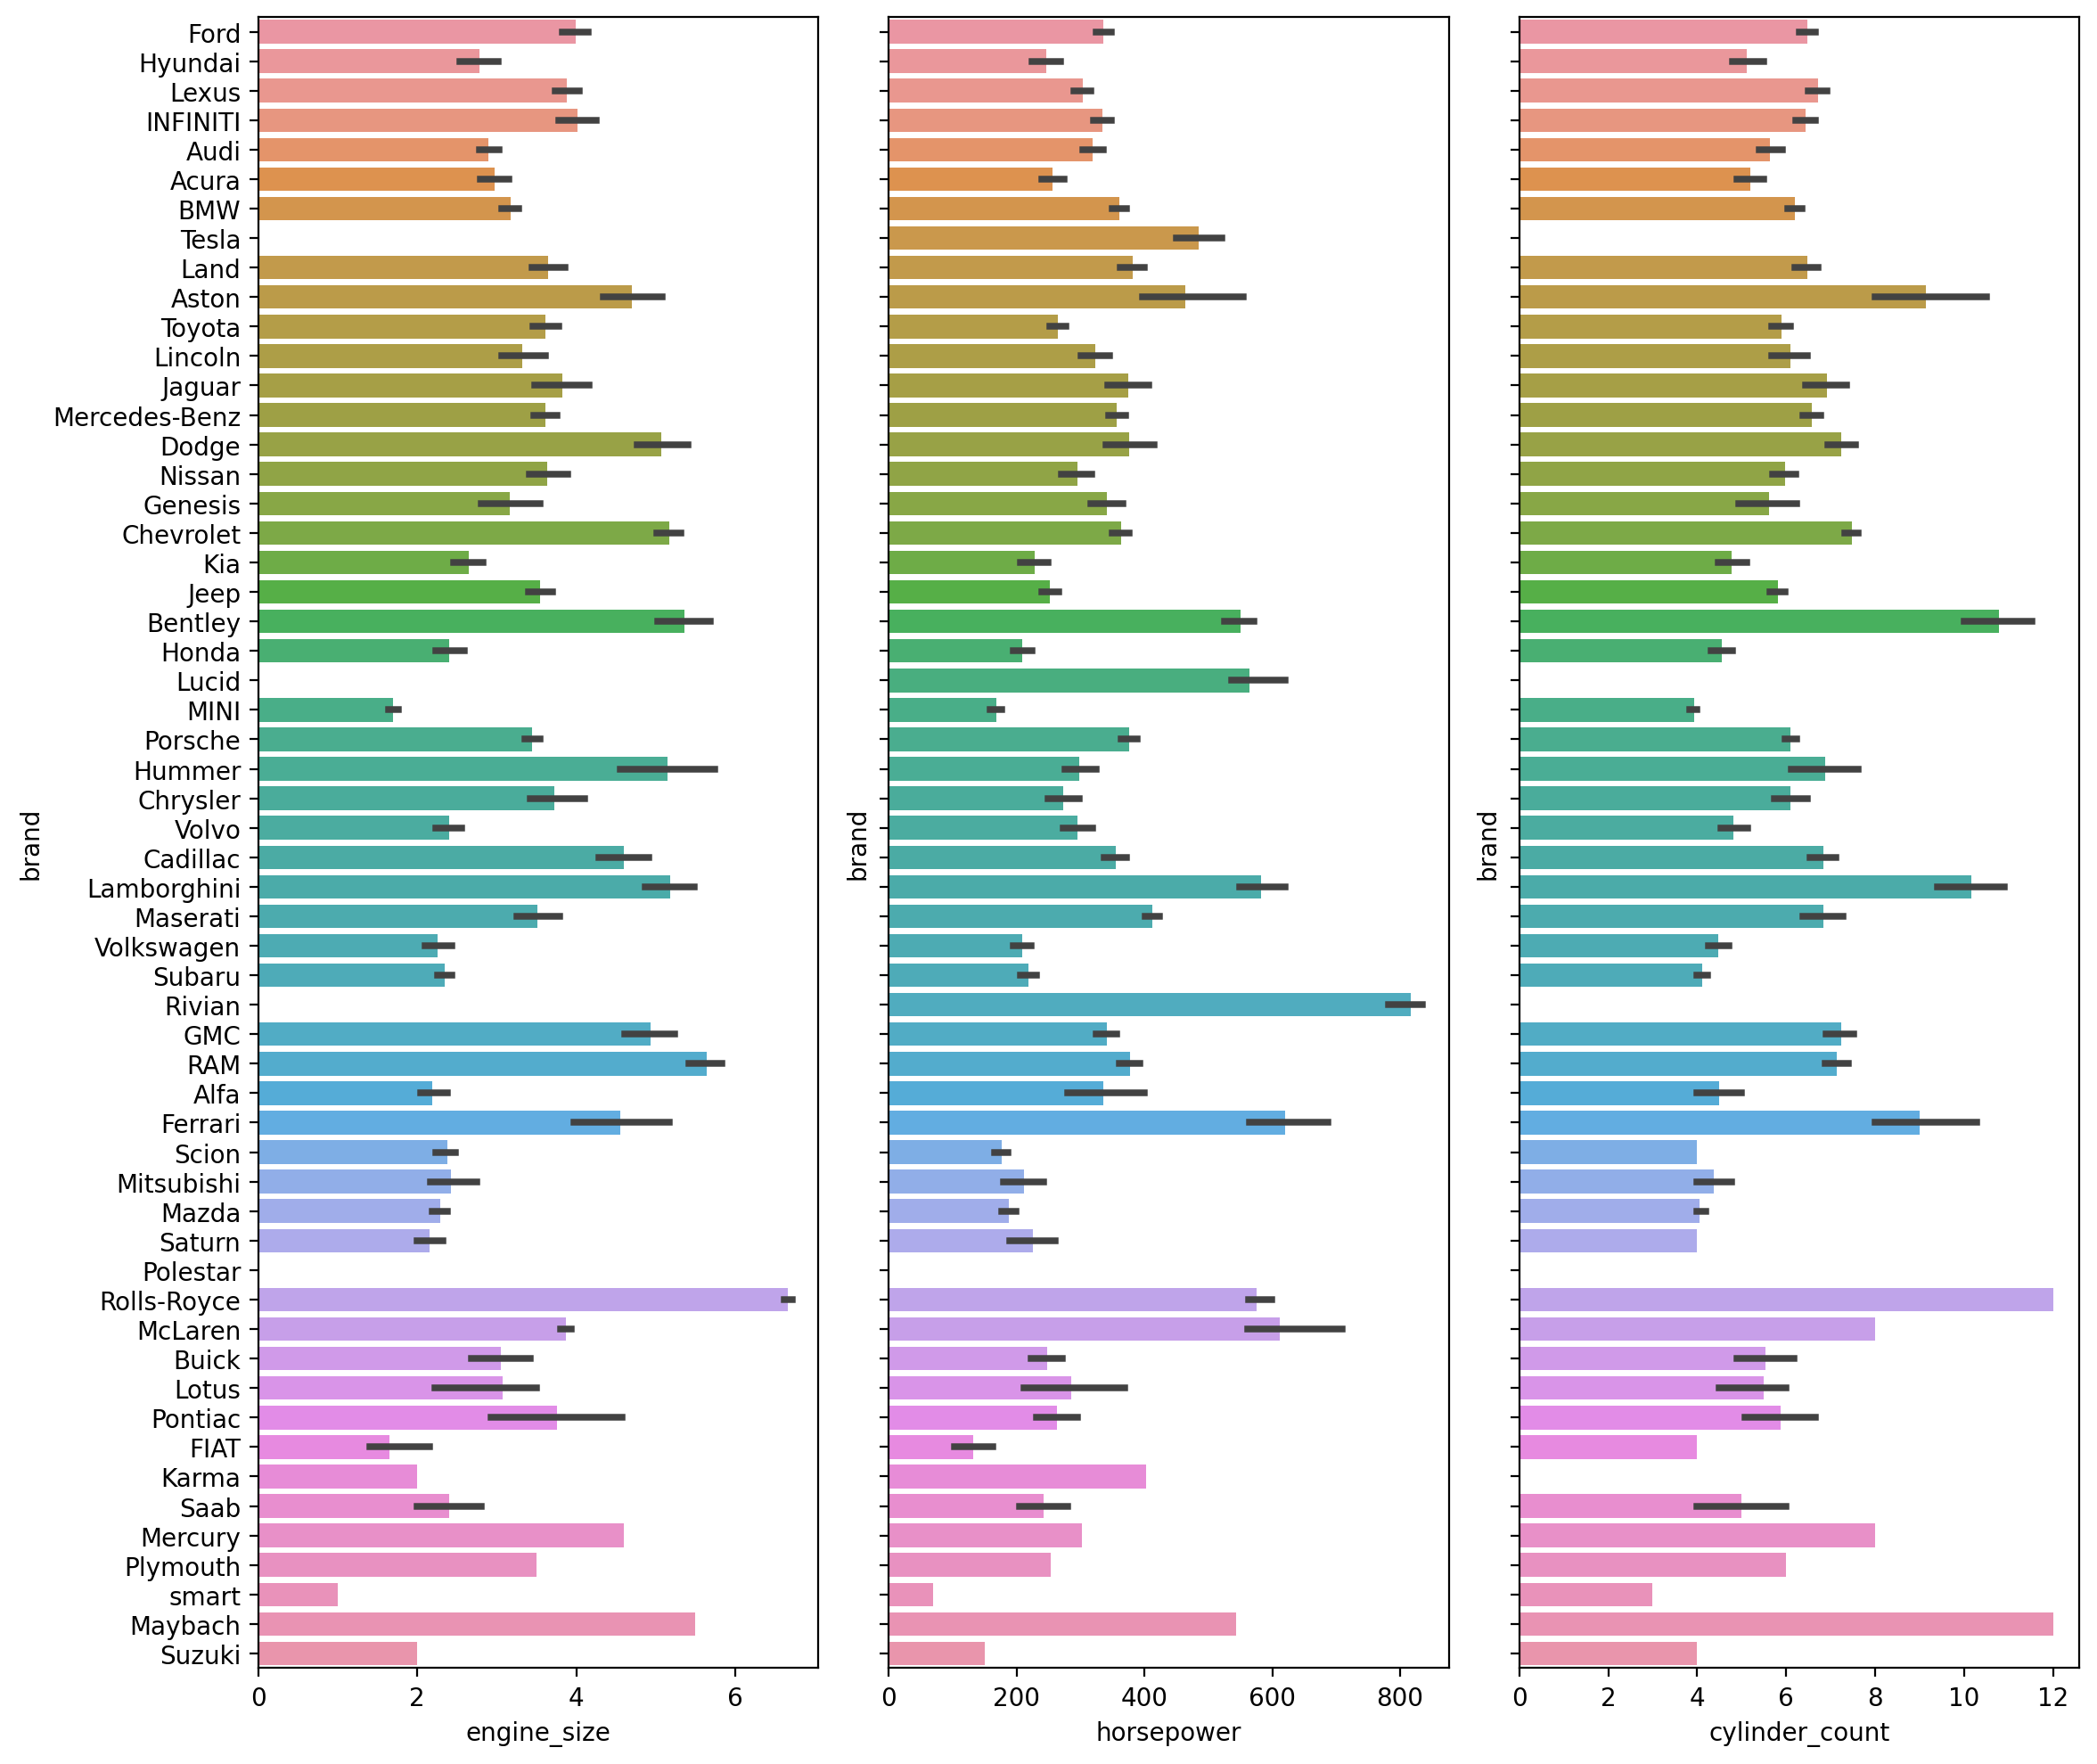

In [67]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(12,10),dpi=200,sharey=True)
sns.barplot(y='brand',x='engine_size',data=df,ax=axes[0])
sns.barplot(y='brand',x='horsepower',data=df,ax=axes[1])
sns.barplot(y='brand',x='cylinder_count',data=df,ax=axes[2])
plt.tight_layout()

In [68]:
from sklearn.impute import SimpleImputer

In [69]:
mean_imputer = SimpleImputer(strategy="mean")

In [70]:
df[['engine_size','horsepower','cylinder_count']] = mean_imputer.fit_transform(df[['engine_size','horsepower','cylinder_count']])

In [71]:
df.isna().sum().sum()

0

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4001 entries, 0 to 4008
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  4001 non-null   object 
 1   model                  4001 non-null   object 
 2   model_year             4001 non-null   int64  
 3   milage                 4001 non-null   int64  
 4   fuel_type              4001 non-null   object 
 5   engine                 4001 non-null   object 
 6   transmission           4001 non-null   object 
 7   ext_col                4001 non-null   object 
 8   int_col                4001 non-null   object 
 9   accident               4001 non-null   object 
 10  clean_title            4001 non-null   object 
 11  price                  4001 non-null   int64  
 12  engine_size            4001 non-null   float64
 13  horsepower             4001 non-null   float64
 14  cylinder_count         4001 non-null   float64
 15  log_trans

In [74]:
# removing unnecessary features

df = df.drop(["model",'engine','price'],axis=1)

In [76]:
# converting 'model_year' to 'car_age'

from datetime import datetime

current_year = datetime.now().year

df['car_age'] = current_year - df['model_year']

In [79]:
df = df.drop('model_year', axis=1)

In [80]:
temp_df = df.copy()

## Dealing with categorical features